# **Sensitive Content Analysis**

## **Importing Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from tensorflow import keras
from keras.preprocessing import image

In [2]:
training_folder="C:/Users/Subho Hazra/Desktop/Sensitive Content Analysis/dataset/training"
validation_folder="C:/Users/Subho Hazra/Desktop/Sensitive Content Analysis/dataset/validation"

In [3]:
train_sensitive=os.path.join(training_folder+"/sensitive")
train_nonsensitive=os.path.join(training_folder+"/nonsensitive")
validation_sensitive=os.path.join(validation_folder+"/sensitive")
validation_nonsensitive=os.path.join(validation_folder+"/nonsensitive")

In [4]:
print("Total Training Sensitive Images : ",len(os.listdir(train_sensitive)))
print("Total Training Non-Sensitive Images : ",len(os.listdir(train_nonsensitive)))
print("Total Validation Sensitive Images : ",len(os.listdir(validation_sensitive)))
print("Total Validation Non-Sensitive Images : ",len(os.listdir(validation_nonsensitive)))

Total Training Sensitive Images :  300
Total Training Non-Sensitive Images :  300
Total Validation Sensitive Images :  50
Total Validation Non-Sensitive Images :  50


## **Sample Data (Data Visualization)**

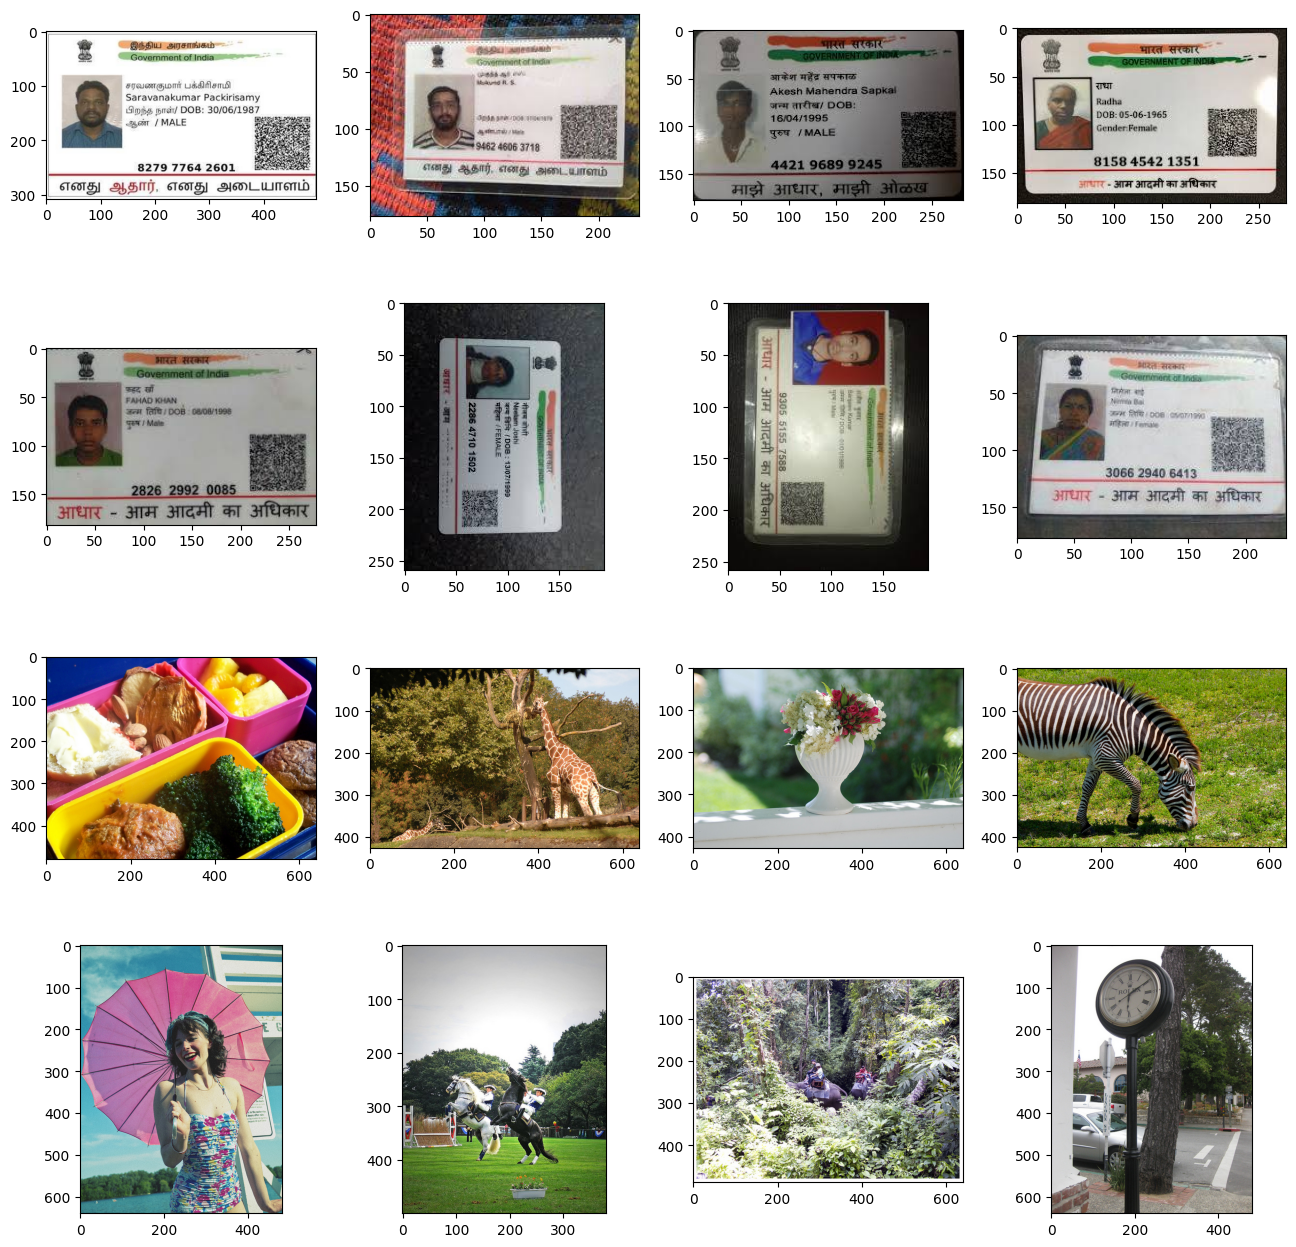

In [5]:
nrows=4
ncols=4

index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

train_sensitive_names=os.listdir(train_sensitive)
train_nonsensitive_names=os.listdir(train_nonsensitive)

index+=8

next_sensitive_pix=[os.path.join(train_sensitive,fname) for fname in train_sensitive_names[index-8:index]]
next_nonsensitive_pix=[os.path.join(train_nonsensitive,fname) for fname in train_nonsensitive_names[index-8:index]]

for i,img_path in enumerate(next_sensitive_pix+next_nonsensitive_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    img=mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## **Model Making**

In [6]:
DESIRED_ACCURACY=0.98

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>DESIRED_ACCURACY:
            print("\n Reached 98% accuracy so Cancelling Training")
            self.model.stop_training=True

callbacks=myCallBack()

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

c:\Users\Subho Hazra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

## **Preprocessing, Data Augmentation and Training**

In [8]:
train_datageneration=ImageDataGenerator(rescale=1/255,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest')

validation_datageneration=ImageDataGenerator(rescale=1/255)

train_generator=train_datageneration.flow_from_directory(
    training_folder,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

validation_generator=validation_datageneration.flow_from_directory(
    training_folder,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

num_epochs=300

history=model.fit(
    train_generator,
    epochs=num_epochs,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/300


c:\Users\Subho Hazra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 534ms/step - accuracy: 0.5273 - loss: 0.7376 - val_accuracy: 0.7333 - val_loss: 0.5665
Epoch 2/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 499ms/step - accuracy: 0.7691 - loss: 0.5089 - val_accuracy: 0.7083 - val_loss: 0.5650
Epoch 3/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 470ms/step - accuracy: 0.7588 - loss: 0.4811 - val_accuracy: 0.7683 - val_loss: 0.4993
Epoch 4/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 470ms/step - accuracy: 0.7848 - loss: 0.4627 - val_accuracy: 0.8400 - val_loss: 0.3911
Epoch 5/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.7565 - loss: 0.4866 - val_accuracy: 0.8100 - val_loss: 0.5810
Epoch 6/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 507ms/step - accuracy: 0.8208 - loss: 0.4306 - val_accuracy: 0.8200 - val_loss: 0.3869
Epoch 7/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 502ms/step - accuracy: 0.8327 - loss: 0.3839 - val_accuracy: 0.6900 - val_loss: 0.5564
Epoch 8/300
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 493ms/step - accuracy: 0.8030 - loss: 0.4433 - val_accuracy

## **Plotting Accuracy and Loss Function**

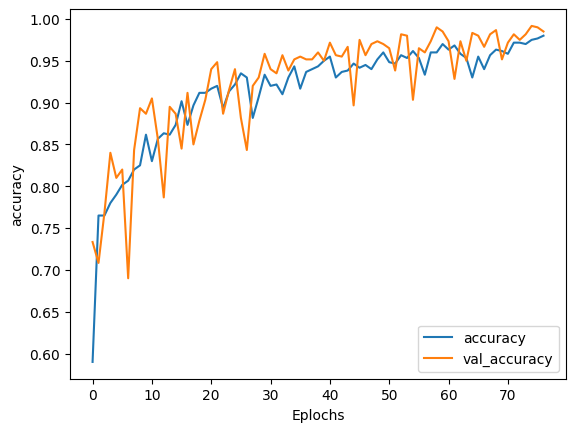

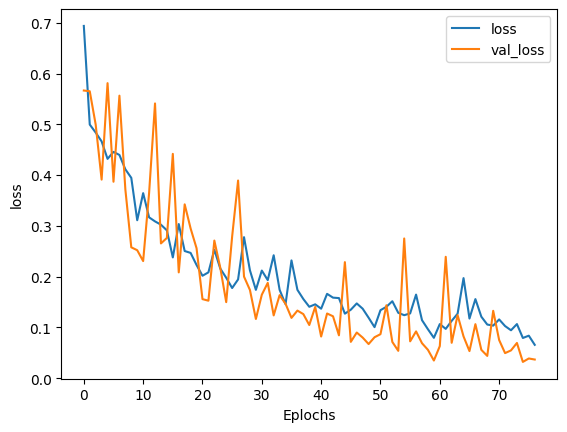

In [9]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Eplochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

## **Confusion Matrix**

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step
Accuracy for 150 Test Data : 54.84%


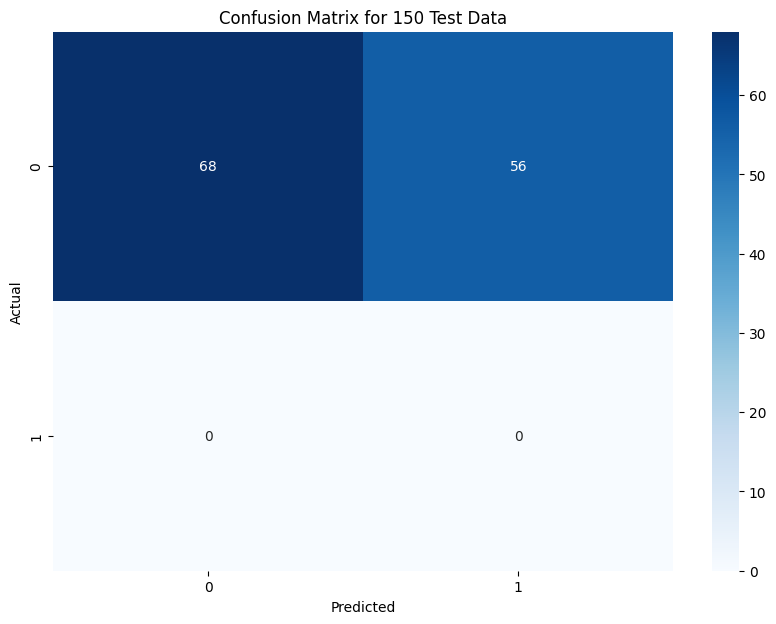

Accuracy for 300 Test Data : 54.27%


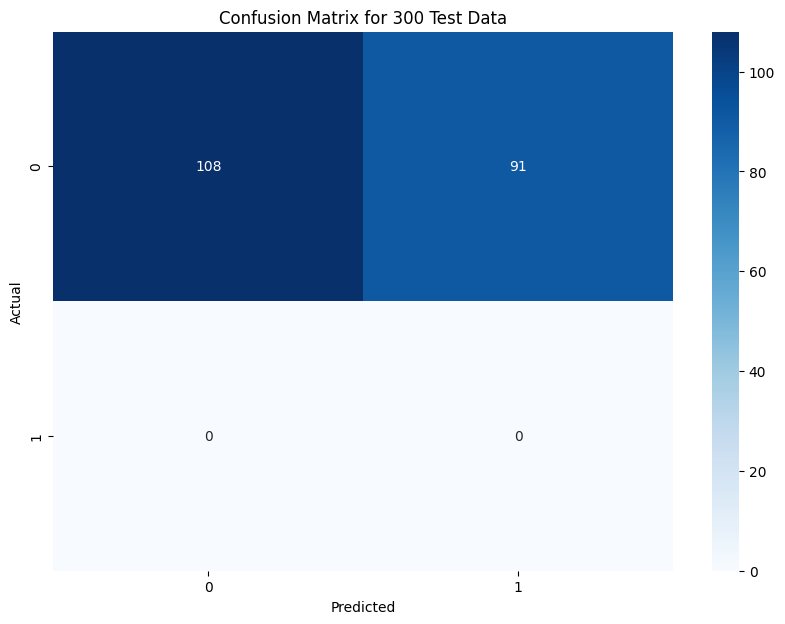

Accuracy for 450 Test Data : 51.82%


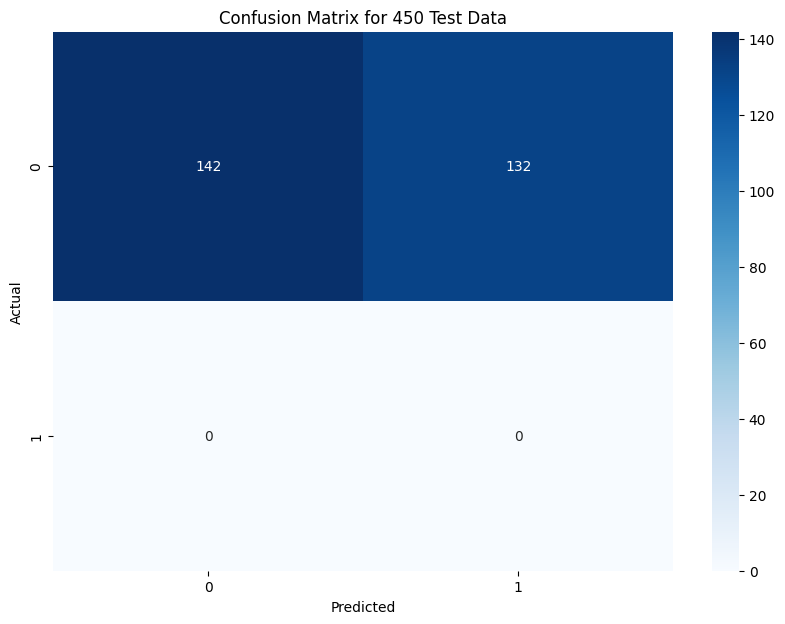

Accuracy for 600 Test Data : 51.86%


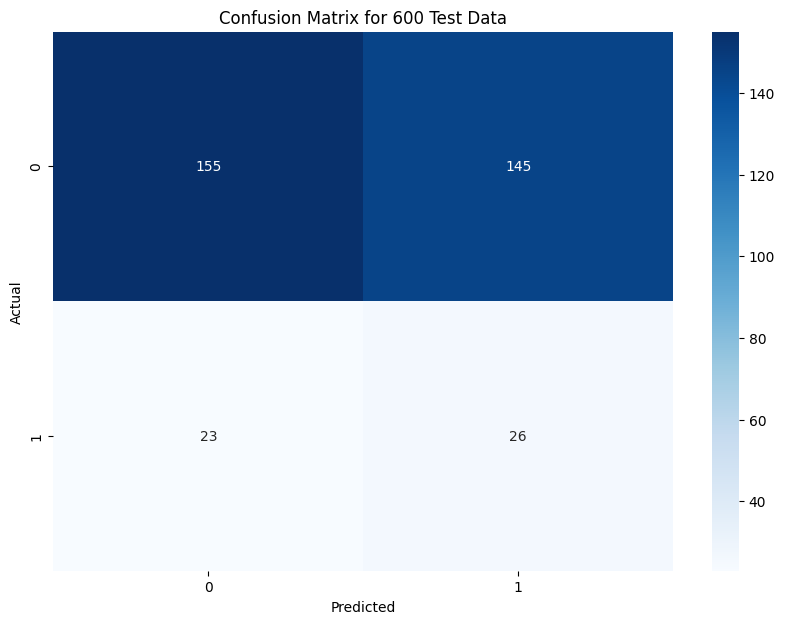

In [24]:
y_pred=model.predict(validation_generator,19)
y_predicted_labels=y_pred>0.5

size=np.size(y_predicted_labels)
y_predicted_labels=y_predicted_labels.reshape(size,)

for i in range(1,5):
    total=i*size//4
    mid = 49
    start = max(0, mid - ((total + 1) // 2) + 1) 
    end = min(size, mid + ((total + 1) // 2))

    cm=tf.math.confusion_matrix(labels=validation_generator.labels[start:end],predictions=y_predicted_labels[start:end])

    cm_np=cm.numpy()
    conf_acc=(cm_np[0,0]+cm_np[1,1])/np.sum(cm_np)*100
    print(f"Accuracy for {total} Test Data : {conf_acc:.2f}%")

    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title(f"Confusion Matrix for {total} Test Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## **Saving the Model**

In [25]:
model.save('models/model_shweta_image.h5')
print("Saved the Model Successfully")

Saved the Model Successfully


In [26]:
model.save('models/model_subho_image.h5')
print("Saved the Extra Model Successfully")

Saved the Extra Model Successfully


## **Saving the model in JSON Format**

In [27]:
from tensorflow.keras.models import model_from_json

model_in_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_in_json)

In [29]:
model_file=open('models/model.json','r')
json_model=model_file.read()
model2=model_from_json(json_model)
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,623,940 (51.97 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,811,971 (25.99 MB)

## **Sample Example**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[1.]
aadhar(2).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1.]
aadharcard(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[1.2796834e-15]
bike(1).jpg- Non-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[1.]
bike(2).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.]
dog(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[1.]
flowe(2).png-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1.]
flower(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1.]
gulugulu(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[1.]
icecream(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[1.]
icecream(2).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[1.]
icecream(3).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[1.]
nepotism(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1.]
pancard(1).jpg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1.]
pancard(2).jpeg-Sensitive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

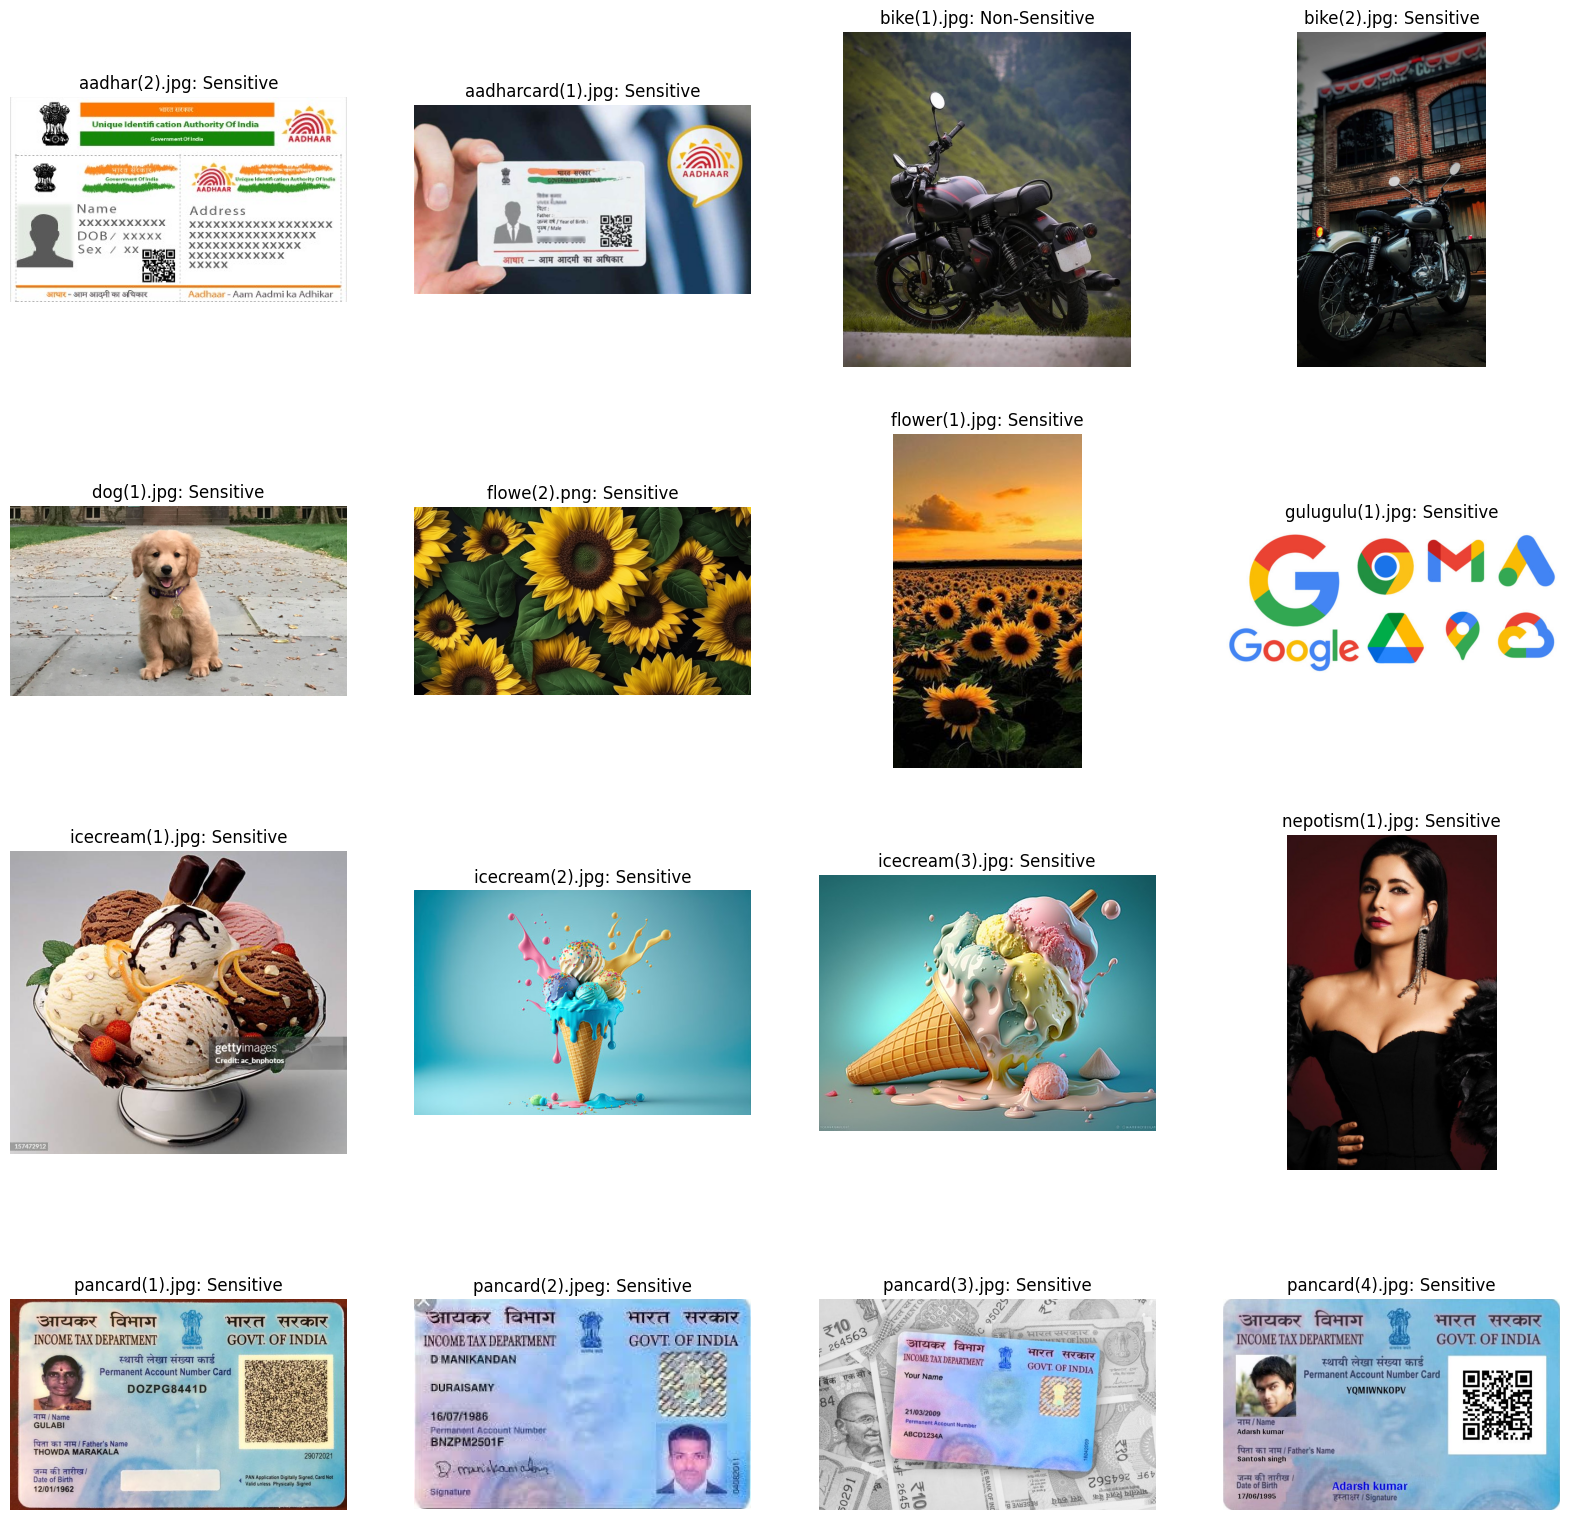

In [42]:
from keras.preprocessing import image

image_directory="C:/Users/Subho Hazra/Desktop/Sensitive Content Analysis/Test Image"
result=dict()

file_names = [fn for fn in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, fn))]

for i in os.listdir(image_directory):
    path=os.path.join(image_directory,i)

    img=image.load_img(path,target_size=(150,150))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])

    classes=model.predict(images,batch_size=10)
    print(classes[0])

    if classes[0]>0.5:
        print(i + "-Sensitive")
        result[i]="Sensitive"
    else:
        print(i + "- Non-Sensitive")
        result[i]="Non-Sensitive"

num_files = len(file_names)
grid_size = int(np.ceil(np.sqrt(num_files)))

plt.figure(figsize=(20,20))
for j,fn in enumerate(os.listdir(image_directory)):
    path=os.path.join(image_directory,fn)
    img=plt.imread(path)
    plt.subplot(grid_size,grid_size,j+1)
    plt.axis("off")
    plt.imshow(img)
    ans=fn+": "+result[fn]
    plt.title(ans)

plt.show()